In [644]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
#Importing packages needed for the model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from collections import Counter
from sklearn.utils import resample
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score

Master chronology created using colums AA to AT (or AA + 19 colums).

In [645]:
try:
    df1 = pd.read_csv('./Training_Data/training_tree_1.csv', index_col=0)
    df2 = pd.read_csv('./Training_Data/training_tree_2.csv', index_col=0)
    df3 = pd.read_csv('./Training_Data/training_tree_3.csv', index_col=0)
    df4 = pd.read_csv('./Training_Data/training_tree_4.csv', index_col=0)
    df5 = pd.read_csv('./Training_Data/training_tree_5.csv', index_col=0)
    df6 = pd.read_csv('./Training_Data/training_tree_6.csv', index_col=0)
    df7 = pd.read_csv('./Training_Data/training_tree_7.csv', index_col=0)
    df8 = pd.read_csv('./Training_Data/training_tree_8.csv', index_col=0)
    df9 = pd.read_csv('./Training_Data/training_tree_9.csv', index_col=0)
    df10 = pd.read_csv('./Training_Data/training_tree_10.csv', index_col=0)
    df11 = pd.read_csv('./Training_Data/training_tree_11.csv', index_col=0)
    df12 = pd.read_csv('./Training_Data/training_tree_12.csv', index_col=0)
    df13 = pd.read_csv('./Training_Data/training_tree_13.csv', index_col=0)
    df14 = pd.read_csv('./Training_Data/training_tree_14.csv', index_col=0)
    df15 = pd.read_csv('./Training_Data/training_tree_15.csv', index_col=0)
    df16 = pd.read_csv('./Training_Data/training_tree_16.csv', index_col=0)
    df17 = pd.read_csv('./Training_Data/training_tree_17.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [646]:
df16.tail()

,master_chronology,SLC09A
year,,
1991,1.446042,2.460997
1992,1.569043,1.169365
1993,1.389070,1.346719
1994,-0.278576,-0.509613
1995,1.419715,1.718732


In [647]:
df15.tail()

,master_chronology,SLC01A
year,,
1991,1.446042,1.048327
1992,1.569043,1.571682
1993,1.389070,0.850798
1994,-0.278576,-0.356532
1995,1.419715,1.723990


# Functions to make the binary classifiers for training

In [648]:
samples = []

for col in df16.columns:
        col_list = df16[col].tolist()
        cleanedList = [x for x in col_list if x == x]
        samples.append(cleanedList)
        
print(len(samples[1]))

186


In [805]:
def making_more_testing_data(df):
    samples = []
    samples1 = []
    answer = []
    segments = {}
    i = 0
    for col in df.columns:
        col_list = df[col].tolist()
        cleanedList = [x for x in col_list if x == x]
        samples.append(cleanedList)

    size = 100
    step = 50
    length = len(samples)
    segments[0] = ([samples[0][i: i + size] for i in range(0, len(samples[0]), step)])

    short0 = []
    for j in range(len(segments[0])):
        if len(segments[0][j]) != 100:
            short0.append(segments[0][j])
        else:
            continue

    size = 10
    step = 1
    length = len(samples)
    segments[1] = ([samples[1][i: i + size] for i in range(0, len(samples[1]), step)])

    short1 = []

    for j in range(len(segments[1])):
        if len(segments[1][j]) != 10:

            short1.append(segments[1][j])

        else:
            continue

    segments0 = [x for x in segments[0] if x not in short0]
    segments1 = [x for x in segments[1] if x not in short1]

    segments[0] = segments0
    segments[1] = segments1

    assert len(segments[0][-1]) == 100
    assert len(segments[1][-1]) == 10
    segments0 = segments[0]
    segments1 = segments[1]
    pairs = [(x + y) for x in segments0 for y in segments1]

    while i < (df.shape[0] - 100):
        new = df.iloc[i:i + 100]
        for col in new.columns:
            col_list = new[col].tolist()
            cleanedList = [x for x in col_list if x == x]
            samples1.append(cleanedList)
        i += 50

    assert len(samples1[-2]) == 100

    i = 1
    while i < len(samples1):

        if len(samples1[i]) < 10:
            for j in range(len(segments[1])):
                answer.append(0)
        elif len(samples1[i]) == 10:
            if find_element_in_list(samples1[i], segments[1]) != None:
                index = find_element_in_list(samples1[i], segments[1])
                for j in range(len(segments[1]) - index - 1):
                    answer.append(0)
                answer.append(1)
                for j in range(len(segments[1]) - index):
                    answer.append(0)
            elif find_element_in_list(samples[i], segments[1]) == None:
                for j in range(len(segments[1])):
                    answer.append(0)
        elif len(samples1[i]) > 10:
            size = 10
            step = 1
            length = len(samples1[i])
            seg = {}
            seg[0] = ([samples1[i][j: j + size] for j in range(0, len(samples1[i]), step)])
            short2 = []
            for j in range(len(seg[0])):
                if len(seg[0][j]) != 10:

                    short2.append(seg[0][j])
                else:
                    continue
            final = [x for x in seg[0] if x not in short2]

            for j in range(len(segments[1])):
                if find_element_in_list(segments[1][j], final) != None:

                    answer.append(1)
                else:

                    answer.append(0)
        i += 2

    return pairs, answer

In [785]:
def correct_pairs(df):
    pair = []
    col_list = []
    correct = []
    samples = []
    no_repeat_correct = []
    i= 0
    for col in df.columns:
        col_list = df[col].tolist()
        cleanedList = [x for x in col_list if x == x]
        samples.append(cleanedList)
    for i in range(np.where(df.iloc[:,1 ] == samples[1][0])[0][0],(np.where(df.iloc[:,1 ] == samples[1][-1])[0][0]-8)):
        new = df.iloc[i:i+10]
        
        for col in new.columns:
            col_list = new[col].tolist()
            
            pair.append(col_list)
        correct.append(pair[0] + pair[1])
        pair = []
    no_repeat_correct = [i for n, i in enumerate(correct) if i not in correct[:n]]
   
    return no_repeat_correct


In [786]:
def find_element_in_list(element, list_element):
    try:
        index_element = list_element.index(element)
        return index_element
    except ValueError:
        return None

In [787]:
def create_pairs(dataframe, section):
    samples = []
    segments = {}
    segment = {}
    size = 10
    step = 1
    i= 0
    for df in dataframe:
        col_list = df.iloc[:, 1].tolist()
        cleanedList = [x for x in col_list if x == x]
        samples.append(cleanedList)
        #print(df)
    
    
    for j in range(len(section)):
        key = int(j)
        segments[key] = ([section[j][i : i + size] for i in range(0, len(section[j]), step)])
    
    for k in range(len(samples)):
        key = int(len(section) + k)
        segments[key] = ([samples[k][i : i + size] for i in range(0, len(samples[k]), step)])
       
    #print(segments[0])
    #print(segments[1])

        
    short = []
    
    for i in range(len(segments)):
        for j in range(len(segments[i])):
            if len(segments[i][j]) != 10:
                short.append(segments[i][j])
            else:
                continue
                
    print(len(segments))
    #print(short)
    master = []
    for i in range(len(section)):
        #print(segments[i])
        master.append([x for x in segments[i] if x not in short])
        #print(master[i])
    #print(master)
    sample = []
    for i in range(len(samples)):
        sample.append([x for x in segments[i+len(section)] if x not in short])

    #print(segments0)
    
    segment[0] = [item for sublist in master for item in sublist]
    segment[1] = [item for sublist in sample for item in sublist]
    print(len(segment[0]))
    print(len(segment[1]))
    segments[0][-1]
    segments0 = segment[0]
    segments1 = segment[1]
    pairs =  [(x + y) for x in segments0 for y in segments1]
    assert len(pairs[-1]) == 20
    #print(pairs[0])
    print(len(pairs))
    
    return pairs


In [788]:
print(len(train_input_no_dup))
train_input_pairs = create_pairs([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14], train_input_no_dup)

15
29
1365
2470
3371550


In [789]:
train_input_pairs = create_pairs([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14], train_input_no_dup)

29
1365
2470
3371550


In [790]:
def create_overlap_binary_class(pairs, correct_pairs):
    
    binary = []
    first_pairs = []
    for j in range(len(correct_pairs)): 
        first_pairs.append(correct_pairs[j][:5])
    correct_pairs = [item for sublist in correct_pairs for item in sublist]
    i=0
    while i < len(pairs):
        
        if pairs[i] in correct_pairs and pairs[i] in first_pairs:
            for t in range(len(first_pairs)):
                if pairs[i] in first_pairs[t]: 
                    for j in range(0,first_pairs[t].index(pairs[i])): 
                        binary.pop()
                    for h in range(0,first_pairs[t].index(pairs[i])):
                        binary.append(1)
                    for f in range(6):
                        binary.append(1)
                    i+=6
        elif pairs[i] in correct_pairs:
            for z in range(0,5):
                binary.pop()
            for f in range(0,11):
                binary.append(1)
            i+=6  
        else: 
            binary.append(0)
            i+=1
    return binary     

In [791]:
def create_overlap_binary_test_class(pairs, correct_pairs):
    binary = []
    found_pairs = []
    i=0
    while i < len(pairs):
        if pairs[i] in correct_pairs:
            if correct_pairs.index(pairs[i]) < 5: 
                for j in range(0,correct_pairs.index(pairs[i])): 
                    binary.pop()
                for h in range(0,correct_pairs.index(pairs[i])):
                    binary.append(1) 
                for f in range(6):
                    binary.append(1)
                    
                i+=6
            else:
                for z in range(0,5):
                    binary.pop() 
                if i < len(pairs)-6:
                    for f in range(0,11):
                        binary.append(1)
                else:
                    for f in range(5+len(pairs)-i):
                        binary.append(1)   
                i+=6  
        else: 
            binary.append(0)
            
            i+=1
    return binary     

In [792]:
def create_binary_class(pairs, correct_pairs):
    binary = []
    for i in range(len(pairs)):
        if pairs[i] in correct_pairs:
            binary.append(1)
        else: 
            binary.append(0)
    return binary     


In [793]:
def create_binary_training_class(pairs, correct_pairs):
    binary = []
    correct_pairs = [item for sublist in correct_pairs for item in sublist]
    for i in range(len(pairs)):
        if pairs[i] in correct_pairs:
            binary.append(1)
        else: 
            binary.append(0)
    return binary     

# Making the testing data

In [794]:
segment = {}

In [806]:
first_match1, first_output1 = making_more_testing_data(df1)
first_match2, first_output2 = making_more_testing_data(df2)
first_match3, first_output3 = making_more_testing_data(df3)
first_match4, first_output4 = making_more_testing_data(df4)
first_match5, first_output5 = making_more_testing_data(df5)
first_match6, first_output6 = making_more_testing_data(df6)
first_match7, first_output7 = making_more_testing_data(df7)
first_match8, first_output8= making_more_testing_data(df8)
first_match9, first_output9 = making_more_testing_data(df9)
first_match10, first_output10 = making_more_testing_data(df10)
first_match11, first_output11 = making_more_testing_data(df11)
first_match12, first_output12 = making_more_testing_data(df12)
first_match13, first_output13 = making_more_testing_data(df13)
first_match14, first_output14 = making_more_testing_data(df14)
first_match15, first_output15 = making_more_testing_data(df15)
first_match16, firzst_output16 = making_more_testing_data(df16)
first_match17, first_output17 = making_more_testing_data(df17)

print(len(first_match15))
print(len(first_match10))
print(len(first_match16))

1050
408
1062


In [796]:
first_match15, first_output15 = making_more_testing_data(df15)
print(len(first_match15))

184
1050


In [797]:
first_match16, first_output16 = making_more_testing_data(df16)
print(len(first_match16))

186
1062


In [798]:
correct_pair1 = correct_pairs(df1)
correct_pair2 = correct_pairs(df2) 
correct_pair3 = correct_pairs(df3) 
correct_pair4 = correct_pairs(df4) 
correct_pair5 = correct_pairs(df5) 
correct_pair6 = correct_pairs(df6) 
correct_pair7 = correct_pairs(df7) 
correct_pair8 = correct_pairs(df8) 
correct_pair9 = correct_pairs(df9) 
correct_pair10 = correct_pairs(df10) 
correct_pair11 = correct_pairs(df11) 
correct_pair12 = correct_pairs(df12) 
correct_pair13 = correct_pairs(df13) 
correct_pair14 = correct_pairs(df14) 
correct_pair15 = correct_pairs(df15)
correct_pair16 = correct_pairs(df16)
correct_pair17 = correct_pairs(df17)
correct_pair_training = [correct_pair1, correct_pair2, correct_pair3, correct_pair4, correct_pair5, correct_pair6, correct_pair7, correct_pair8, correct_pair9, correct_pair10, correct_pair11, correct_pair12, correct_pair13, correct_pair14]
print(len(correct_pair_training))
total = 0
for i in range(len(correct_pair_training)):
    total += len(correct_pair_training[i])
print(total)

14
2470


In [666]:
total_first_matches = first_match1 + first_match2 + first_match3 + first_match4 + first_match5 + first_match6 + first_match7 + first_match8 + first_match9 + first_match10 + first_match11 + first_match12 + first_match13 + first_match14
total_first_ouputs = first_output1 + first_output2 + first_output3 + first_output4 + first_output5 + first_output6 + first_output7 + first_output8 + first_output9 + first_output10 + first_output11 + first_output12 + first_output13 + first_output14 
x = total_first_matches
y = total_first_ouputs
strat = pd.Series(y)

In [667]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4, stratify= strat )
print('Training Data: ')
print(len(x_train))
print('----------------------------------------------')
print('Testing Data: ')
print(len(x_test))

Training Data: 
8892
----------------------------------------------
Testing Data: 
5928


In [668]:
mlp = MLPClassifier()

In [669]:
parameter_space = {
    'hidden_layer_sizes': [(300,100,)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'alpha': [0.001],
    'learning_rate': ['constant'],
    'max_iter' : [7000],
    'early_stopping' : [False]
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
clf.fit(x_train, y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.001],
                         'early_stopping': [False],
                         'hidden_layer_sizes': [(300, 100)],
                         'learning_rate': ['constant'], 'max_iter': [7000],
                         'solver': ['adam']})

In [670]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'early_stopping': False, 'hidden_layer_sizes': (300, 100), 'learning_rate': 'constant', 'max_iter': 7000, 'solver': 'adam'}


In [834]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.819 (+/-0.018) for {'activation': 'relu', 'alpha': 0.001, 'early_stopping': False, 'hidden_layer_sizes': (300, 100), 'learning_rate': 'constant', 'max_iter': 7000, 'solver': 'adam'}


In [835]:
y_true, y_pred = y_test , clf.predict(x_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4472
           1       0.66      0.60      0.63      1456

    accuracy                           0.83      5928
   macro avg       0.77      0.75      0.76      5928
weighted avg       0.82      0.83      0.82      5928



In [673]:
precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.7666609664257988, 0.7509823025811397, 0.7581378137386763, None)

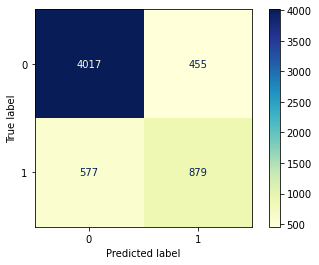

In [674]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")

plt.show()

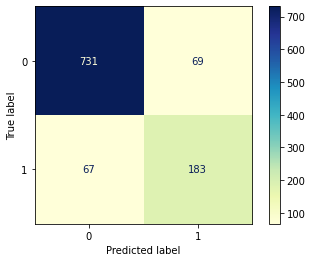

In [675]:
outputs= clf.predict(first_match15)
cm = confusion_matrix(first_output15, clf.predict(first_match15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")
plt.show()

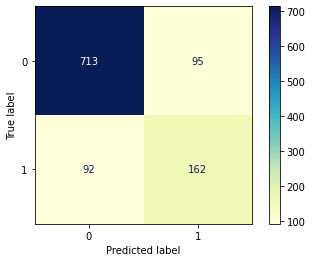

In [676]:
second_outputs= clf.predict(first_match16)
cm = confusion_matrix(first_output16, clf.predict(first_match16))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")
plt.show()

# Model 1 complete

In [677]:
model_1_output = pd.DataFrame()
model_1_output['Input'] = first_match15
model_1_output['Output'] = outputs

In [678]:
second_model_1_output = pd.DataFrame()
second_model_1_output['Input'] = first_match16
second_model_1_output['Output'] = second_outputs

In [679]:
model_1_training_output = pd.DataFrame()
model_1_training_output['Input'] = x_test 
model_1_training_output['Output'] = y_pred

In [680]:
true_model_output = model_1_output.loc[model_1_output['Output'] == 1]
second_true_model_output = second_model_1_output.loc[second_model_1_output['Output'] == 1]
true_training_model_output = model_1_training_output.loc[model_1_training_output['Output'] == 1]

In [681]:
true_model_output.shape

(252, 2)

In [682]:
inputs = true_model_output['Input'].to_numpy()
inputs = inputs.tolist()
input2 =[]
for i in range(len(inputs)):
    input2.append(inputs[i][0:100])
input_no_dup =  [i for n, i in enumerate(input2) if i not in input2[:n]]
input_pairs = create_pairs([df15], input_no_dup)

7
546
175
95550


In [684]:
second_inputs = second_true_model_output['Input'].to_numpy()
second_inputs = second_inputs.tolist()
second_input2 =[]
for i in range(len(second_inputs)):
    second_input2.append(second_inputs[i][0:100])
second_input_no_dup =  [i for n, i in enumerate(second_input2) if i not in second_input2[:n]]
second_input_pairs = create_pairs([df16], second_input_no_dup)

6
455
177
80535


In [685]:
training_inputs = true_training_model_output['Input'].to_numpy()
training_inputs = training_inputs.tolist()
train_inputs2 = []
for i in range(len(training_inputs)):
    train_inputs2.append(training_inputs[i][0:100])
train_input_no_dup =  [i for n, i in enumerate(train_inputs2) if i not in train_inputs2[:n]]
print(len(train_input_no_dup))
train_input_pairs = create_pairs([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14], train_input_no_dup)

15
29
1365
2470
3371550


In [686]:
binary_training = create_overlap_binary_class(train_input_pairs, correct_pair_training)
binary = create_overlap_binary_test_class(input_pairs, correct_pair15)
second_binary = create_overlap_binary_test_class(second_input_pairs, correct_pair16)

In [687]:
print(total)
print(Counter(binary))
print(Counter(binary_training))
print(Counter(second_binary))

2470
Counter({0: 92830, 1: 2720})
Counter({0: 3331510, 1: 40040})
Counter({0: 77771, 1: 2764})


In [688]:
x2 = train_input_pairs
y2 = binary_training

In [689]:
x2 = pd.Series(x2)
y2 = pd.Series(y2)
print(x2)
print(y2)

0          [1.4885024, 0.41062662, -0.291773, 1.38177596,...
1          [1.4885024, 0.41062662, -0.291773, 1.38177596,...
2          [1.4885024, 0.41062662, -0.291773, 1.38177596,...
3          [1.4885024, 0.41062662, -0.291773, 1.38177596,...
4          [1.4885024, 0.41062662, -0.291773, 1.38177596,...
                                 ...                        
3371545    [0.6378242, 0.62562863, 1.01135455, 1.72364085...
3371546    [0.6378242, 0.62562863, 1.01135455, 1.72364085...
3371547    [0.6378242, 0.62562863, 1.01135455, 1.72364085...
3371548    [0.6378242, 0.62562863, 1.01135455, 1.72364085...
3371549    [0.6378242, 0.62562863, 1.01135455, 1.72364085...
Length: 3371550, dtype: object
0          0
1          0
2          0
3          0
4          0
          ..
3371545    0
3371546    0
3371547    0
3371548    0
3371549    0
Length: 3371550, dtype: int64


In [690]:
df = pd.concat([x2,y2], axis=1)
print(df)

                                                         0  1
0        [1.4885024, 0.41062662, -0.291773, 1.38177596,...  0
1        [1.4885024, 0.41062662, -0.291773, 1.38177596,...  0
2        [1.4885024, 0.41062662, -0.291773, 1.38177596,...  0
3        [1.4885024, 0.41062662, -0.291773, 1.38177596,...  0
4        [1.4885024, 0.41062662, -0.291773, 1.38177596,...  0
...                                                    ... ..
3371545  [0.6378242, 0.62562863, 1.01135455, 1.72364085...  0
3371546  [0.6378242, 0.62562863, 1.01135455, 1.72364085...  0
3371547  [0.6378242, 0.62562863, 1.01135455, 1.72364085...  0
3371548  [0.6378242, 0.62562863, 1.01135455, 1.72364085...  0
3371549  [0.6378242, 0.62562863, 1.01135455, 1.72364085...  0

[3371550 rows x 2 columns]


In [691]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.5)
print('Training Data: ')
print(len(x2_train))
print('----------------------------------------------')
print('Testing Data: ')
print(len(x2_test))

Training Data: 
1685775
----------------------------------------------
Testing Data: 
1685775


In [692]:
print('y_train class distribution')
print(y2_train.value_counts(normalize=True))
print('y_test class distribution')
print(y2_test.value_counts(normalize=True))

y_train class distribution
0    0.988061
1    0.011939
dtype: float64
y_test class distribution
0    0.988188
1    0.011812
dtype: float64


In [693]:
training_set = pd.concat([x2_train, y2_train], axis=1)
match = training_set[training_set.iloc[:, 1] == 1]
no_match = training_set[training_set.iloc[:, 1] == 0]

In [694]:
undersample = resample(no_match, replace = True, n_samples = len(match))
undersample_train = pd.concat([match, undersample])
print(undersample_train)
undersample_train.iloc[:, 1].value_counts(normalize = True)

                                                         0  1
266081   [1.61855335, -0.6791819, 0.5894996, 0.95217467...  1
1946090  [-0.2804868, 1.17584809, 1.83135523, 1.5120994...  1
320982   [2.40829634, 1.59231896, 1.17019402, 1.2151748...  1
2017425  [2.50469109, 0.91246684, 1.39053399, -0.766296...  1
236753   [0.80209846, 1.37932635, 0.22155837, 1.7715290...  1
...                                                    ... ..
2417996  [0.525734368, 1.453157001, 1.563900754, 0.8838...  0
610549   [-0.483887097, 0.92917536, 0.996057031, 2.5185...  0
2032068  [-1.0732052, 0.64256171, 0.6597507, 1.77399482...  0
236059   [0.80209846, 1.37932635, 0.22155837, 1.7715290...  0
2787449  [-0.094270079, 1.357937188, 1.638711314, 0.658...  0

[40254 rows x 2 columns]


1    0.5
0    0.5
Name: 1, dtype: float64

In [695]:
undersample_x_train = np.array(undersample_train.drop(1, axis = 1))
undersample_y_train = undersample_train[1]
#print(undersample_x_train)
print(undersample_y_train)
undersample_x_train_list = []
for i in range(len(undersample_x_train)):
    if len(undersample_x_train[i][0]) == 20:
        undersample_x_train_list.append(undersample_x_train[i][0])
        i+=1
    else:
        #print(undersample_x_train[i])
        print(len(undersample_x_train[i]))
        i+=1
print(len(x_test))
x_test_list =  np.array(x2_test,dtype = list);
x2_test_final = []
for i in range(len(x_test_list)):

    if len(x_test_list[i]) == 20:
        x2_test_final.append(x_test_list[i])
        i+=1
    else:
        #print(undersample_x_train[i])
        #print(len(undersample_x_train[i]))
        i+=1
print(len(undersample_x_train_list))
print(len(undersample_y_train))
print(len(x2_test_final))

266081     1
1946090    1
320982     1
2017425    1
236753     1
          ..
2417996    0
610549     0
2032068    0
236059     0
2787449    0
Name: 1, Length: 40254, dtype: int64
5928
40254
40254
1685775


In [696]:
mlp2 = MLPClassifier()

In [697]:
parameter_space = {
    'hidden_layer_sizes': [ (164,160,120,)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
    'max_iter' : [5000],
    'early_stopping' : [False]
}
clf2 = GridSearchCV(mlp2, parameter_space, n_jobs=-1, cv=10)
clf2.fit(undersample_x_train_list, undersample_y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'early_stopping': [False],
                         'hidden_layer_sizes': [(164, 160, 120)],
                         'learning_rate': ['constant'], 'max_iter': [5000],
                         'solver': ['adam']})

In [836]:
print('Best parameters found:\n', clf2.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (164, 160, 120), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'adam'}


In [837]:
means = clf2.cv_results_['mean_test_score']
stds = clf2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.779 (+/-0.016) for {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (164, 160, 120), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'adam'}


In [839]:
y2_true, y2_pred = y2_test , clf2.predict(x2_test_final)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y2_true, y2_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87   1665862
           1       0.04      0.78      0.08     19913

    accuracy                           0.78   1685775
   macro avg       0.52      0.78      0.48   1685775
weighted avg       0.99      0.78      0.87   1685775



In [701]:
precision_recall_fscore_support(y2_true, y2_pred, average='macro')

(0.7666609664257988, 0.7509823025811397, 0.7581378137386763, None)

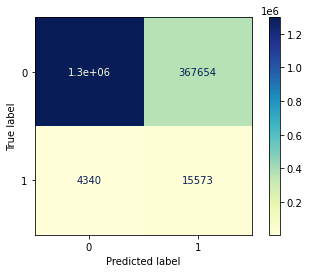

In [702]:
cm = confusion_matrix(y2_true, y2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")

plt.show()

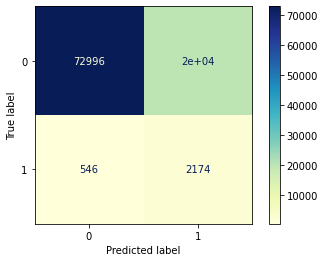

In [703]:
outputs= clf2.predict(input_pairs)
cm = confusion_matrix(binary, clf2.predict(input_pairs))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")
plt.show()

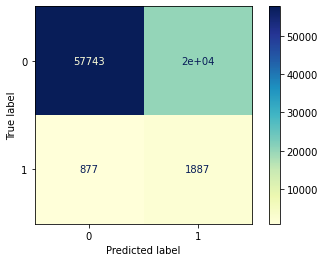

In [704]:
second_outputs= clf2.predict(second_input_pairs)
cm = confusion_matrix(second_binary, clf2.predict(second_input_pairs))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")
plt.show()

# Model 2 complete

In [705]:
model_2_training_output = pd.DataFrame()
model_2_training_output['Input'] = x2_test_final
model_2_training_output['Output'] = y2_pred

In [706]:
second_model_2_output = pd.DataFrame()
second_model_2_output['Input'] = second_input_pairs
second_model_2_output['Output'] = second_outputs

In [707]:
model_2_output = pd.DataFrame()
model_2_output['Input'] = input_pairs
model_2_output['Output'] = outputs

In [708]:
true_model_training_output2 = model_2_training_output.loc[model_2_training_output['Output'] == 1]
true_model_output2 = model_2_output.loc[model_2_output['Output'] == 1]
second_true_model_output2 = second_model_2_output.loc[second_model_2_output['Output'] == 1]

In [709]:
training_inputs2 = true_model_training_output2['Input'].to_numpy()
inputs2 = true_model_output2['Input'].to_numpy()
second_inputs2 = second_true_model_output2['Input'].to_numpy()

In [710]:
training_inputs3 = training_inputs2.tolist()
inputs3 = inputs2.tolist()
second_inputs3 = second_inputs2.tolist()

In [711]:
training_correct = create_binary_training_class(training_inputs2, correct_pair_training)
correct2 = create_binary_class(inputs2, correct_pair15)
second_correct2 = create_binary_class(second_inputs2, correct_pair16)

In [712]:
print(Counter(training_correct))
print(Counter(correct2))
print(Counter(second_correct2))

Counter({0: 381784, 1: 1443})
Counter({0: 21819, 1: 189})
Counter({0: 21731, 1: 184})


In [810]:
x3 = pd.Series(training_inputs3)
y3 = pd.Series(training_correct)
print(x3)
print(y3)

0         [1.381435791, -1.073205217, 0.642561713, 0.659...
1         [2.04463417, 0.90436038, -0.3294019, 0.4924466...
2         [1.204560256, 1.193276075, 0.988821603, -0.206...
3         [1.139929482, 0.836088762, 0.58126879, 0.97348...
4         [1.50744405, 1.4885024, 0.41062662, -0.291773,...
                                ...                        
383222    [0.789497318, 0.298639244, 1.513617755, 0.7388...
383223    [1.77152905, 1.08235686, 2.08999633, 1.0744051...
383224    [0.20384265, 1.14818802, -0.5688825, 1.2955036...
383225    [0.691233919, 1.382665225, 1.732319519, 0.8931...
383226    [1.020978421, 0.071805527, 1.178792732, -0.745...
Length: 383227, dtype: object
0         0
1         0
2         0
3         0
4         0
         ..
383222    0
383223    0
383224    0
383225    0
383226    0
Length: 383227, dtype: int64


In [807]:
x3 = training_inputs3
y3 = training_correct

In [811]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.5)
print('Training Data: ')
print(len(x_train))
print('----------------------------------------------')
print('Testing Data: ')
print(len(x_test))


Training Data: 
8892
----------------------------------------------
Testing Data: 
5928


In [812]:
training_set3 = pd.concat([x3_train, y3_train], axis=1)
match3 = training_set3[training_set3.iloc[:, 1] == 1]
no_match3 = training_set3[training_set3.iloc[:, 1] == 0]

In [813]:
undersample3 = resample(no_match3, replace = True, n_samples = len(match3))
undersample_train3 = pd.concat([match3, undersample3])
print(undersample_train3)
undersample_train3.iloc[:, 1].value_counts(normalize = True)

                                                        0  1
89365   [1.14818802, -0.5688825, 1.29550367, 1.2215059...  1
221316  [1.61855335, -0.6791819, 0.5894996, 0.95217467...  1
366055  [0.863887903, 1.621562201, 1.789349772, 1.1561...  1
278636  [0.843701931, 0.929993694, 1.698734285, 1.1073...  1
92353   [-0.1102514, 0.06852848, 1.01821553, 1.3139206...  1
...                                                   ... ..
265065  [1.33270282, 1.77969428, 1.5396454, 0.9735593,...  0
25406   [1.58996733, 0.769886, 1.80648463, 1.13992948,...  0
149647  [0.492446636, -0.006488797, 1.332702824, 1.779...  0
61587   [-1.249796541, 0.538684009, 0.633023227, 0.593...  0
177589  [1.08235686, 2.089996327, 1.074405162, -0.4304...  0

[1428 rows x 2 columns]


1    0.5
0    0.5
Name: 1, dtype: float64

In [721]:
undersample_x_train3 = np.array(undersample_train3.drop(1, axis = 1))
undersample_y_train3 = undersample_train3[1]
#print(undersample_x_train)
print(undersample_y_train3)
undersample_x_train_list3 = []
for i in range(len(undersample_x_train3)):
    if len(undersample_x_train3[i][0]) == 20:
        undersample_x_train_list3.append(undersample_x_train3[i][0])
        i+=1
    else:
        continue
        i+=1
x_test_list3 =  np.array(x3_test,dtype = list)
x_test_final3 = []
for i in range(len(x_test_list3)):
    if len(x_test_list3[i]) == 20:
        x_test_final3.append(x_test_list3[i])
    else:
        #print(undersample_x_train[i])
        #print(len(undersample_x_train[i]))
        continue
print(len(undersample_x_train_list3))
print(len(undersample_y_train3))
print(len(x_test_final3))

62008     1
181879    1
4580      1
341875    1
15338     1
         ..
130297    0
97032     0
194749    0
143532    0
7208      0
Name: 1, Length: 1472, dtype: int64
1472
1472
191614


In [905]:
mlp3 = MLPClassifier()

In [906]:
parameter_space = {
    'hidden_layer_sizes': [(525,)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['invscaling'],
    'max_iter' : [600],
    'early_stopping' : [False]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
clf3 = GridSearchCV(mlp3, parameter_space, n_jobs=-1, cv=10)
clf3.fit(undersample_x_train_list3, undersample_y_train3) # X is train samples and y is the corresponding labels

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'early_stopping': [False],
                         'hidden_layer_sizes': [(525,)],
                         'learning_rate': ['invscaling'], 'max_iter': [600],
                         'solver': ['adam']})

In [907]:
print('Best parameters found:\n', clf3.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (525,), 'learning_rate': 'invscaling', 'max_iter': 600, 'solver': 'adam'}


In [908]:
means = clf3.cv_results_['mean_test_score']
stds = clf3.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf3.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.872 (+/-0.048) for {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (525,), 'learning_rate': 'invscaling', 'max_iter': 600, 'solver': 'adam'}


In [909]:
y3_true, y3_pred = y3_test , clf3.predict(x_test_final3)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y3_true, y3_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    190885
           1       0.00      0.13      0.01       729

    accuracy                           0.88    191614
   macro avg       0.50      0.51      0.47    191614
weighted avg       0.99      0.88      0.93    191614



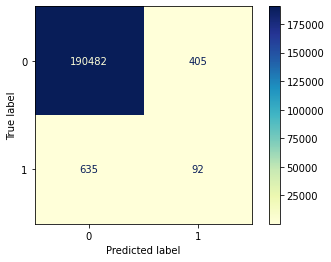

In [753]:
cm = confusion_matrix(y3_true, y3_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")

plt.show()

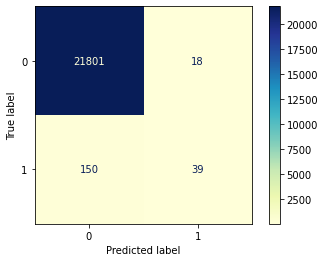

In [754]:
output3 = clf3.predict(inputs3)
cm = confusion_matrix(correct2, output3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")

plt.show()

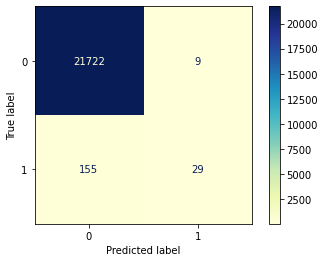

In [755]:
second_output3 = clf3.predict(second_inputs3)
cm = confusion_matrix(second_correct2, second_output3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1], )
disp.plot(cmap="YlGnBu")

plt.show()

# Model 3 Completed

In [756]:
model_3_output = pd.DataFrame()
model_3_output['Input'] = inputs3
model_3_output['Output'] = output3
model_3_output.head()

,Input,Output
0,"[2.23587, 1.1323287, -0.8415643, -0.1301236, 1...",0
1,"[2.23587, 1.1323287, -0.8415643, -0.1301236, 1...",0
2,"[2.23587, 1.1323287, -0.8415643, -0.1301236, 1...",0
3,"[2.23587, 1.1323287, -0.8415643, -0.1301236, 1...",0
4,"[2.23587, 1.1323287, -0.8415643, -0.1301236, 1...",0


In [757]:
second_model_3_output = pd.DataFrame()
second_model_3_output['Input'] = second_inputs3
second_model_3_output['Output'] = second_output3
second_model_3_output.head()

,Input,Output
0,"[2.25950532, 1.61886373, 1.33494407, 1.1247960...",0
1,"[1.61886373, 1.33494407, 1.12479603, 1.0783026...",0
2,"[1.61886373, 1.33494407, 1.12479603, 1.0783026...",0
3,"[1.61886373, 1.33494407, 1.12479603, 1.0783026...",0
4,"[1.61886373, 1.33494407, 1.12479603, 1.0783026...",0


In [758]:
true_model3_output = model_3_output.loc[model_3_output['Output'] == 1]
true_model3_output.head()

,Input,Output
811,"[-0.2386402, 0.50251261, -0.3771488, 1.0446443...",1
1193,"[-0.2386402, 0.50251261, -0.3771488, 1.0446443...",1
1613,"[1.77399482, 2.32922038, 0.90477069, 0.7773836...",1
2066,"[0.61136053, 1.75372833, 1.58500661, 1.3334394...",1
2686,"[1.77399482, 2.32922038, 0.90477069, 0.7773836...",1


In [759]:
second_true_model3_output = second_model_3_output.loc[second_model_3_output['Output'] == 1]
second_true_model3_output.head()

,Input,Output
4036,"[2.12745041, 2.01290169, 0.9113422, 0.62391176...",1
5675,"[1.38293722, 1.0880557, 0.20795981, -0.2748426...",1
6037,"[2.12745041, 2.01290169, 0.9113422, 0.62391176...",1
7676,"[1.38293722, 1.0880557, 0.20795981, -0.2748426...",1
8449,"[1.93025973, 0.80209846, 1.37932635, 0.2215583...",1


In [760]:
all_contender = true_model3_output['Input'].to_numpy()
print(len(all_contender))

57


In [761]:
second_all_contender = second_true_model3_output['Input'].to_numpy()
print(len(second_all_contender))

38


In [762]:
samples15 = []
i= 0
for col in df15.columns:
    col_list = df15[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples15.append(cleanedList)
print(len(samples15[1]))  

184


In [763]:
samples16 = []
i= 0
for col in df16.columns:
    col_list = df16[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples16.append(cleanedList)
    
print(len(samples16[1]))

186


In [770]:
start_year = []
for i in range (len(all_contender.tolist())):
    (master_seg15, sample_seg15) = all_contender[i][0:9], all_contender[i][10:20]
    #print(f'{i} : {master_seg8, sample_seg8}')
    start_year.append(df15.first_valid_index() + samples15[0].index(master_seg15[0]) - samples15[1].index(sample_seg15[0]))
print(len(start_year))
print(Counter(start_year).most_common(5))
final_counter = Counter(start_year)

57
[(1812, 39), (1751, 4), (1791, 4), (1539, 2), (1629, 2)]


In [820]:
second_start_year = []
for i in range (len(second_all_contender.tolist())):
    (master_seg16, sample_seg16) = second_all_contender[i][0:9], second_all_contender[i][10:20]
    #print(f'{i} : {master_seg16, sample_seg16}')
    second_start_year.append(df16.first_valid_index() + samples16[0].index(master_seg16[0]) - samples16[1].index(sample_seg16[0]))
print(len(second_start_year))
print(Counter(second_start_year).most_common(20))
second_final_counter = Counter(second_start_year)
print(second_final_counter.most_common(1)[0][0])

38
[(1810, 29), (1719, 2), (1663, 2), (1824, 2), (1789, 2), (1819, 1)]
1810


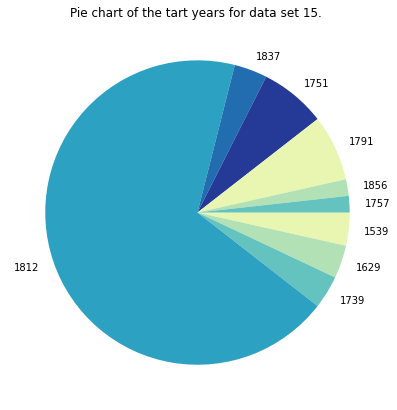

In [900]:
# Get the Keys and store them in a list
labels = list(final_counter.keys())

# Get the Values and store them in a list
values = list(final_counter.values())
plt.figure(figsize=(10,7))
plt.pie(values, labels=labels, colors=sns.color_palette("YlGnBu"),
    # plot slices clockwise
    counterclock=False)
plt.title("Pie chart of the tart years for data set 15. ")
plt.show()

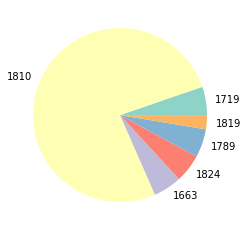

In [862]:
# Get the Keys and store them in a list
labels = list(second_final_counter.keys())

# Get the Values and store them in a list
values = list(second_final_counter.values())
plt.pie(values, labels=labels, colors=sns.color_palette('Set3'))
plt.show()

[(1810, 29), (1719, 2), (1663, 2), (1824, 2), (1789, 2), (1819, 1)]


<BarContainer object of 6 artists>

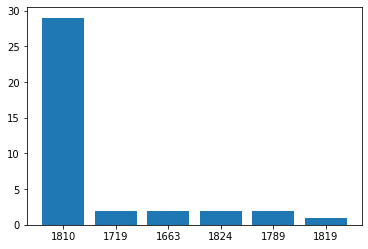

In [831]:
# Get the Keys and store them in a list
print(second_final_counter.most_common())
labels = list([second_final_counter.most_common()[item][0] for item in range(len(second_final_counter.most_common()))])
labels = [str(label) for label in labels]
# Get the Values and store them in a list
values = list([second_final_counter.most_common()[item][1] for item in range(len(second_final_counter.most_common()))])
plt.bar(labels, values)

In [766]:
df15.apply(pd.Series.first_valid_index)

master_chronology    1630
SLC01A               1812
dtype: int64

In [767]:
df16.apply(pd.Series.first_valid_index)

master_chronology    1630
SLC09A               1810
dtype: int64